
# UD1 · Parte 2 — Ficheros, POO y Tiempos en Python

**ALUMN@:** Carlos Hidalgo (UD1 PIA)  
**Objetivo:** Continuación del cuaderno anterior. Aquí trabajamos **manipulación de ficheros**, **POO** (métodos de instancia, `@classmethod`, `@staticmethod`), **herencia**, **polimorfismo**, **métodos especiales** (`__len__`, `__str__`...), **manejo de errores**, **`datetime` y `time`** (incluyendo **formato Unix**).



## Índice rápido
1. [Preparación del entorno (archivos de ejemplo)](#prep)
2. [Entrada/Salida básica y variables globales](#io-basico)
3. [Lectura de ficheros: `open`, `read`, `readline`, `seek`, `tell`](#lectura)
4. [Escritura y _append_](#escritura)
5. [Directorios con `os` y rutas con `pathlib`](#directorios)
6. [**Examen de mentira #1**: Gestión del Parque Jurásico (ficheros y menú)](#examen1)
7. [POO — Clases y objetos](#poo-basico)
8. [Métodos de instancia, `@classmethod` y `@staticmethod`](#metodos)
9. [Herencia y polimorfismo](#herencia-polimorfismo)
10. [Métodos especiales: `__len__`, `__str__`, `__repr__`](#metodos-especiales)
11. [**Examen de mentira #2**: Mini-RPG de personajes](#examen2)
12. [Manejo de excepciones (incl. excepciones personalizadas)](#excepciones)
13. [`datetime`: fechas, horas, `timedelta` y formateo](#datetime)
14. [`time`: mediciones, pausas y **timestamp Unix**](#time)
15. [**Examen de mentira #3**: ¡Viajar en el tiempo!](#examen3)



---
<a id="prep"></a>
## 1) Preparación del entorno (archivos de ejemplo)

Para que el cuaderno sea **ejecutable y autocontenido**, creamos archivos y carpetas de trabajo locales.


In [16]:
from pathlib import Path

# Obtener la ruta actual y añadimos la ubicación de una carpeta aún inexistente

BASE = Path.cwd() /"ud1_parte2"

# Creamos la carpeta

BASE.mkdir(exist_ok=True)

# Mostrar la ruta de la carpeta

print("Carpeta de trabajo: ", BASE)

# Creamos un fichero de lectura de ejemplo

prueba_txt = BASE / "Prueba.txt"

# Comprobar si el archivo existe antes de crearlo 

if not prueba_txt.exists():
    prueba_txt.write_text(
        "Linea 1: Hola Mundo \n"
        "Linea 2: Esto es un archivo de prueba. \n"
        "Linea 3: fin",
        encoding="utf-8"
        )
    

# Definir la ruta principal

dinos_dir = BASE / "dinosaurios"

# Creamos dos subcarpetzs

(dinos_dir / "Carnivoros").mkdir(parents= True, exist_ok= True)
(dinos_dir / "Vegetarianos").mkdir(parents= True, exist_ok= True)

# Creamos un fichero dentro de carnivoros 

(dinos_dir / "Carnivoros" / "dino_carnivoros.txt").write_text(
    "Dino1\nDino2\nDino3",
    encoding="utf-8"
)


Carpeta de trabajo:  /home/iabd00/Escritorio/Clases/PIA/ud1_parte2


17


---
<a id="lectura"></a>
## 2) Lectura de ficheros: `open`, `read`, `readline`, `seek`, `tell` 

Buenas prácticas:
- Usar **context managers** (`with open(...) as f:`) para cerrar automáticamente.
- Entender puntero de lectura con `tell()` y reposicionarlo con `seek()`.


In [ ]:
# Abrir en modo lectura

mi_archivo = open("ud1_parte2/Prueba.txt", encoding="utf-8")

# Tipo de objeto 
print(type(mi_archivo))
print(mi_archivo)

# Leer su contenido 

contenido = mi_archivo.read()

print(contenido)

print(f"posicion actual del puntero: {mi_archivo.tell()}.")
mi_archivo.seek(0)
print(f"posicion tras el seek del puntero: {mi_archivo.tell()}.")

# Leer el contenido linea a linea

linea = mi_archivo.readline().strip()
print("Primera linea: ", linea)
print("Segunda linea: ", mi_archivo.readline())

# Iterar por cada linea del texto

mi_archivo.seek(0)
for linea in mi_archivo:
    print("Aqui dice : ", linea.strip())
    
    
# Tambien podemos obtener todas las lineas y almacenarlas en una lista
mi_archivo.seek(0)
print(mi_archivo.readlines())

# Cerramos el fichero
mi_archivo.close()


<class '_io.TextIOWrapper'>
<_io.TextIOWrapper name='ud1_parte2/Prueba.txt' mode='r' encoding='utf-8'>
Linea 1: Hola Mundo 
Linea 2: Esto es un archivo de prueba. 
Linea 3: fin 
posicion actual del puntero: 74.
posicion tras el seek del puntero: 0.
Primera linea:  Linea 1: Hola Mundo
Segunda linea:  Linea 2: Esto es un archivo de prueba. 

Aqui dice :  Linea 1: Hola Mundo ['Linea 1: Hola Mundo \n']
Aqui dice :  Linea 2: Esto es un archivo de prueba. ['Linea 2: Esto es un archivo de prueba. \n']
Aqui dice :  Linea 3: fin ['Linea 3: fin ']



---
<a id="escritura"></a>
## 3) Escritura y *append* 

Modos habituales:  
- `'w'` crea/sobrescribe,  
- `'a'` añade al final,  
- `'r'` lectura.


--- CONTENIDO DEL ARCHIVO ---
Soy un texto nuevo.
Yo nuevísimo.
Agrego más palabras.

Soy un texto nuevo.
Yo nuevísimo.
Agrego más palabras.




---
<a id="directorios"></a>
## 4) Directorios con `os` y rutas con `pathlib`

> Evitamos `chdir` a rutas del sistema del profesor (como `C:\Users\...`).  
> En su lugar trabajamos dentro de la carpeta del proyecto/notebook.


Directorio actual (os.getcwd()): c:\Users\carlo\OneDrive\Escritorio\Ataulfo Argenta\5073 - PIA 2025\01-Scripts\Notebooks\UD1
Leyendo via Path: Contenido de ejemplo con pathlib.


Subcarpeta creada: c:\Users\carlo\OneDrive\Escritorio\Ataulfo Argenta\5073 - PIA 2025\01-Scripts\Notebooks\UD1\ejemplo_pathlib\subcarpeta
¿Existe la subcarpeta? True
¿Es un archivo? False
¿Es una carpeta? True

Contenido del directorio BASE:
 - subcarpeta

Nombre: info.txt
Extensión: .txt
Ruta completa: C:\Users\carlo\OneDrive\Escritorio\Ataulfo Argenta\5073 - PIA 2025\01-Scripts\Notebooks\UD1\ejemplo_pathlib\subcarpeta\info.txt
Tamaño en bytes: 17

Archivos .txt en BASE (usando glob):
 - c:\Users\carlo\OneDrive\Escritorio\Ataulfo Argenta\5073 - PIA 2025\01-Scripts\Notebooks\UD1\ejemplo_pathlib\subcarpeta\info.txt

Lectura mediante conversión explícita: Probando pathlib.



---
<a id="examen1"></a>
## **Examen de mentira #1** — Gestión del Parque Jurásico 🦖 (ficheros y menú)

**Objetivo:** practicar menús, lectura/escritura en ficheros y manejo de rutas.  
Estructura ya creada en `./ud1_parte2_data/dinosaurios/` con **Carnívoros** y **Vegetarianos**.


In [7]:
from pathlib import Path

# NOTA: Asegúrate de tener definida la variable BASE en tu cuaderno/script,
# por ejemplo: BASE = Path.cwd() / "ud1_parte2_data"

ruta_dinosaurios = BASE / "dinosaurios"
ruta_carnivoros = ruta_dinosaurios / "Carnívoros" / "carnivoros.txt"
ruta_vegetarianos = ruta_dinosaurios / "Vegetarianos" / "vegetarianos.txt"


def leer_dinosaurios(ruta: Path) -> None:
    """Muestra en pantalla los dinosaurios guardados en un fichero de texto."""
    # TODO: Comprobar si el archivo existe.
    # PISTA: usa ruta.exists(); si no existe, imprime un aviso y return.

    # TODO: Leer el contenido del fichero y dividirlo en líneas.
    # PISTA: puedes usar ruta.read_text(encoding="utf-8").splitlines()
    #        o bien open(ruta, 'r', encoding='utf-8') + readlines().

    print(f"Dinosaurios en {ruta.name}:")
    # TODO: Recorrer la lista de líneas y mostrarlas con un guion delante.
    # PISTA: for d in lista: print(" -", d)
    # (No imprimir nada si el archivo está vacío.)


def añadir_dinosaurio(ruta: Path, dinosaurio: str) -> None:
    """Añade un dinosaurio (una línea) al final del fichero."""
    # TODO: Abrir el archivo en modo append y escribir el nombre + salto de línea.
    # PISTA: open(ruta, 'a', encoding='utf-8') y luego f.write(dinosaurio + '\n')

    # TODO: Mostrar un mensaje de confirmación.
    # PISTA: usa ruta.parent.name para imprimir la categoría (carpeta).


def eliminar_dinosaurio(ruta: Path, dinosaurio: str) -> None:
    """Elimina una línea igual a 'dinosaurio' del fichero, si existe."""
    # TODO: Comprobar si el archivo existe; si no, avisar y return.

    # TODO: Leer todas las líneas en una lista.
    # PISTA: splitlines() devuelve una lista sin '\n'.

    # TODO: Si dinosaurio está en la lista, eliminarlo; si no, avisar.
    # PISTA: usa list.remove(dinosaurio) con try/except ValueError o un if ... in ...

    # TODO: Escribir de nuevo el archivo con las líneas restantes (una por línea).
    # PISTA: "\n".join(lista) + ("\n" si la lista no está vacía).
    #        Puedes usar ruta.write_text(..., encoding='utf-8').

    # TODO: Mensaje final indicando si se eliminó o no el dinosaurio.


def menu():
    while True:
        print("\n*** Gestión del Parque Jurásico ***")
        print("[1] Leer dinosaurios")
        print("[2] Añadir dinosaurio")
        print("[3] Eliminar dinosaurio")
        print("[4] Salir")
        eleccion = input("Elige una opción: ")

        if eleccion == '1':
            categoria = input("Elige categoría (carnívoros/vegetarianos): ").lower()
            if categoria == 'carnívoros':
                leer_dinosaurios(ruta_carnivoros)
            elif categoria == 'vegetarianos':
                leer_dinosaurios(ruta_vegetarianos)
            else:
                print("Categoría no válida.")

        elif eleccion == '2':
            categoria = input("Elige categoría (carnívoros/vegetarianos): ").lower()
            dinosaurio = input("Introduce el nombre del dinosaurio: ").capitalize()
            if categoria == 'carnívoros':
                añadir_dinosaurio(ruta_carnivoros, dinosaurio)
            elif categoria == 'vegetarianos':
                añadir_dinosaurio(ruta_vegetarianos, dinosaurio)
            else:
                print("Categoría no válida.")

        elif eleccion == '3':
            categoria = input("Elige categoría (carnívoros/vegetarianos): ").lower()
            dinosaurio = input("Introduce el nombre del dinosaurio a eliminar: ").capitalize()
            if categoria == 'carnívoros':
                eliminar_dinosaurio(ruta_carnivoros, dinosaurio)
            elif categoria == 'vegetarianos':
                eliminar_dinosaurio(ruta_vegetarianos, dinosaurio)
            else:
                print("Categoría no válida.")

        elif eleccion == '4':
            print("Saliendo del programa...")
            break
        else:
            print("Opción no válida. Inténtalo de nuevo.")

# Para ejecutar en modo interactivo:
# menu()



---
<a id="poo-basico"></a>
## 5) POO — Clases y objetos 

Ejemplo 1: `Casa` con atributos de clase e instancia.  
Ejemplo 2: `Equinos` con métodos de instancia.


La casa grande tiene 10 habitaciones.
La casa mediana tiene 4 habitaciones.


Caballo está trotando.
Caballo está comiendo manzana
Unicornio tiene 4 patas.
¿Tiene cuerno? True
¿Ahora tiene rayas mágicas? True
Unicornio está trotando.
Unicornio está comiendo hierba



---
<a id="metodos"></a>
## 6) Métodos de instancia, `@classmethod` y `@staticmethod` 

- **Instancia**: accede/ modifica `self`.
- **`@classmethod`**: recibe `cls` (la **clase**). Suele usarse para **constructores alternativos** o estado compartido.
- **`@staticmethod`**: función utilitaria sin `self` ni `cls`.


Piolín es de color amarillo
El pájaro ha volado 200 metros.
Pío pío
Al pájaro le cae un rayo...
Ahora el pájaro es negro
Piolín ahora es de color negro

Huevos totales (inicial): 0
🥚 Se han puesto 3 huevos más.
Ahora el total global de huevos de todos los pájaros es 3.
Los pájaros tienen 3 huevos totales. Paloma también tiene3 huevos totales.
El pájaro miró (utilidad estática).



---
<a id="herencia-polimorfismo"></a>
## 7) Herencia y polimorfismo

- **Herencia**: `Perro(Mascota)` reutiliza/ especializa comportamiento.
- **Polimorfismo**: distintas subclases implementan el **mismo método** con comportamientos diferentes.



---
<a id="metodos-especiales"></a>
## 8) Métodos especiales: `__len__`, `__str__`, `__repr__` 

- `__len__` define el resultado de `len(obj)`  
- `__str__` define la **representación legible** para personas (print)  
- `__repr__` define una representación **no ambigua** (útil para depurar)


688
"El Imperio Final" de Brandon Sanderson (688 págs.)


Libro(titulo='El Imperio Final', autor='Brandon Sanderson', paginas=688)


---
<a id="examen2"></a>
## **Examen de mentira #2** — Mini-RPG (clases, herencia, polimorfismo)

# ⚔️ Examen de Mentira #2 — Crea tu propio personaje (Herencia y métodos de clase)

## 🎯 Objetivo
Diseñar un pequeño sistema de personajes para un juego de rol utilizando **Programación Orientada a Objetos (POO)**, aplicando los conceptos de **herencia**, **sobrescritura de métodos** y **métodos de clase**.

---

## 🧩 Instrucciones

1. **Crea una clase base llamada `PersonajeHumano`** que tenga:
   - Un atributo de clase `especie = "humano"`.
   - Un constructor (`__init__`) con los atributos:
     - `nombre`
     - `salud` (por defecto 100)
     - `nivel` (por defecto 1)
   - Un método de instancia `atacar()` que muestre un mensaje genérico.
   - Un método de clase `mostrar_especie()` que imprima el valor del atributo de clase.

2. **Crea tres clases hijas** que hereden de `PersonajeHumano`:
   - 🧙‍♂️ **`Mago`**  
     - Añade un nuevo atributo `hechizo` (por defecto “Bola de Fuego”).  
     - Sobrescribe el método `atacar()` para lanzar el hechizo.

   - 🛡️ **`Guerrero`**  
     - Añade un atributo `defensa`.  
     - Modifica el constructor para aumentar su salud en función de la defensa.  
     - Sobrescribe el método `atacar()` para que muestre su propio mensaje.

   - 🏹 **`Arquero`**  
     - Añade un atributo `precision` (empieza en 0).  
     - Crea un método `calcular_precision()` que genere un número aleatorio (`random.random()`) y determine si acierta o falla el ataque.  
     - Haz que `atacar()` llame a `calcular_precision()`.

3. **Crea una función `crear_personaje()`** que:
   - Pida al usuario el tipo de personaje (`Mago`, `Guerrero` o `Arquero`).
   - Pida su nombre.
   - Devuelva una instancia del tipo elegido.

4. **Prueba el programa:**
   - Crea varios personajes de distintos tipos utilizando un bucle.
   - Llama a sus métodos `atacar()` para comprobar sus diferencias.
   - Usa el método de clase `mostrar_especie()` para ver la especie común.

---

## 🐉 Ataque de Dragón (Uso de `@classmethod`)

Crea un método de clase llamado **`ataque_de_dragon()`** dentro de la clase base `PersonajeHumano` que:

- Muestre el mensaje:  
  `"🔥 ¡El dragón ha atacado! Todos los personajes han perdido su salud."`
- Ponga la **salud de todos los personajes en 0** (usando un atributo de clase, por ejemplo `salud_global` o accediendo al atributo `salud` de cada instancia si los guardas en una lista).
- Después del ataque, muestra la salud de cada personaje por pantalla.

💡 *Sugerencia:* puedes mantener una lista de todos los personajes creados y recorrerla desde el método de clase para aplicar el daño.

---

## 🧠 Objetivos de aprendizaje
- Entender y aplicar la **herencia** entre clases.
- Diferenciar entre **atributos de clase** y **atributos de instancia**.
- Practicar la **sobrescritura de métodos** en subclases.
- Aprender a crear y utilizar **métodos de clase (`@classmethod`)**.
- Usar **`random.random()`** para generar valores aleatorios y simular ataques.

---

✅ **Entrega sugerida:**
- Código funcional con al menos 3 personajes.
- Cada personaje debe tener su propio método `atacar()` personalizado.
- El ataque de dragón debe dejar a todos con salud = 0.
- Mostrar la salud final de cada personaje.




In [ ]:
# Ejecuta tu código y haz una prueba para que al corregirlo lo vea directamente. 



---
<a id="excepciones"></a>
## 9) Manejo de excepciones 

- Capturar errores comunes: `ZeroDivisionError`, `ValueError`, `IndexError`  
- Crear **excepciones personalizadas** para reglas de negocio


Resultado correcto: 5.0 | Color: Rojo
Bloque finally: se ejecuta siempre (limpieza, cierres, etc.).


🧠 Iniciando entrenamiento del modelo de IA...
Objetos disponibles para entrenar: ['gato', 'perro', 'silla', 'taza']
✅ Modelo entrenando con imágenes de 'gato'...
💾 Guardando pesos del modelo...

🔁 Reiniciando el ciclo de entrenamiento...

✅ Modelo entrenando con imágenes de 'perro'...
💾 Guardando pesos del modelo...

🔁 Reiniciando el ciclo de entrenamiento...

✅ Modelo entrenando con imágenes de 'silla'...
💾 Guardando pesos del modelo...

🔁 Reiniciando el ciclo de entrenamiento...

💥 Error de entrenamiento detectado: Los datos de 'taza' están corruptos. Entrenamiento cancelado para este objeto.
🧰 Solución automática: saltando este conjunto de datos y continuando...
🔁 Reiniciando el ciclo de entrenamiento...

✅ Modelo entrenando con imágenes de 'perro'...
💾 Guardando pesos del modelo...

🔁 Reiniciando el ciclo de entrenamiento...

🏁 Entrenamiento finalizado. El modelo está listo para probar.



---
<a id="datetime"></a>
## 10) `datetime`: fechas, horas, `timedelta` y formateo 

Puntos clave:
- `datetime.now()` y atributos (`year`, `month`, ...)
- Sumar/restar con `timedelta`
- Formateo con `strftime`


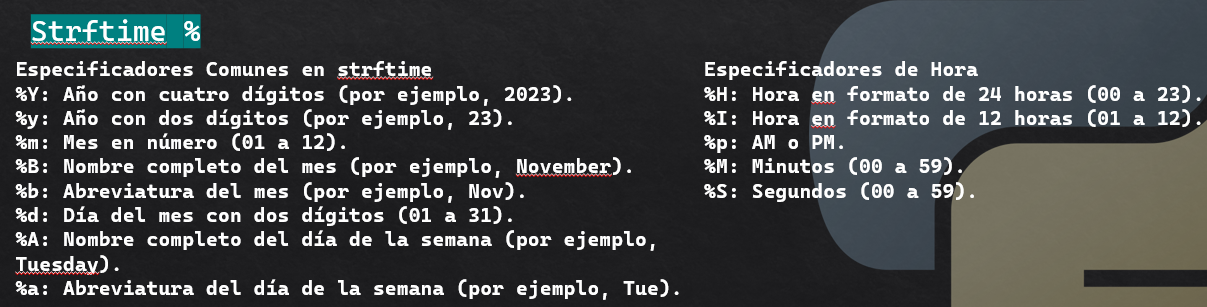


Fecha y hora actuales: 2025-10-21 12:19:54.234575
Año: 2025
Mes: 10
Minuto: 19
Segundo: 54
En 10 días: 2025-10-31 12:19:54.234575
Formato personalizado: 31/10/2025  12:19:54



---
<a id="time"></a>
## 12) `time`: mediciones, pausas y **timestamp Unix** 

- **Medición** con `time.perf_counter()`  
- **Pausa** con `time.sleep(segundos)`  
- **Unix timestamp**: segundos desde **1 de enero de 1970 (UTC)**  
  - `time.time()` → *float* (segundos)  
  - `datetime.fromtimestamp(ts)` convierte a `datetime` local  
  - `datetime.timestamp(dt)` convierte `datetime` → *timestamp*


Iteración: 0
Iteración: 1
Iteración: 2
Tiempo de ejecución total: 1.502 s
Timestamp Unix actual (segundos desde Epoch): 1761042036.506642
A datetime local desde timestamp: 2025-10-21 12:20:36.506642
Volver a timestamp desde datetime.now(): 1761042036.506642




<a id="examen3"></a>
## **Examen de mentira #3** — ¡Viajar en el tiempo! (excepciones + `datetime` + `time.sleep`)

# 🕰️ Examen de Mentira #3 — ¡Viaje en el Tiempo!

## 🎯 Objetivo
Simular un viaje en el tiempo usando **fechas (`datetime`)**, **esperas temporales (`time.sleep`)** y **manejo de excepciones**, incluyendo una **excepción personalizada**.



## 🧩 Instrucciones

1. **Crea una clase de excepción personalizada** llamada `NoCero`, que herede de `Exception`.  
   - Servirá para evitar viajes en el tiempo de 0 años.

2. **Crea una función llamada `viajar_tiempo()`** que:
   - Pida al usuario cuántos años quiere viajar (entero positivo o negativo).  
   - Obtenga la **fecha actual** con `datetime.now()`.  
   - Muestre la fecha actual formateada con `.strftime('%d/%m/%Y')`.  
   - Si el usuario introduce `0`, lance la excepción `NoCero` con el mensaje:  
     `"No puedes viajar a este mismo instante."`
   - Calcule la **fecha destino** sumando o restando años usando `timedelta(days=anios_viaje * 365)`.
   - Simule el “viaje temporal” con una **pausa de 1 segundo** (`time.sleep(1)`).
   - Finalmente, muestre la nueva fecha alcanzada.

3. **Controla los errores** con un bloque `try/except`:
   - Si el usuario introduce un valor que no sea número, muestra:  
     `"Error: ingresa un número entero."`
   - Si se lanza la excepción `NoCero`, muestra el mensaje de error definido en ella.

4. **Incluye un bloque `finally`** que imprima siempre:  
   `"Simulación completada."`  
   (se ejecute o no el viaje con éxito).


## 💡 Pistas
- Usa `raise` para lanzar manualmente una excepción.  
- Utiliza `datetime.now()` y `timedelta()` para mover la fecha.  
- `time.sleep(1)` hará una pausa para simular el efecto del viaje.  
- Puedes formatear las fechas con `strftime()` para mostrarlas de forma legible.  

## 🧠 Objetivos de aprendizaje
- Comprender el uso de **`datetime`** y **`timedelta`** para trabajar con fechas.  
- Aplicar **excepciones personalizadas** para crear reglas propias.  
- Usar **`try / except / finally`** para manejar errores y limpiar procesos.  
- Utilizar **`time.sleep()`** para simular pausas o procesos en tiempo real.

✅ **Entrega sugerida:**
- Código funcional que solicite el número de años a viajar.  
- Manejo correcto de excepciones (`ValueError`, `NoCero`).  
- Muestra la fecha actual y la fecha destino formateadas.  
- Mensaje final de simulación completada.
